# Loading Libraries and Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, plot_confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import LinearSVC, SVC
from mlxtend.plotting import plot_decision_regions

In [3]:
loans_df = pd.read_csv('data/loan.csv')

In [4]:
loans_df.head()

,loan_id,account_id,date,amount,duration,payments,status,account_id.1,district_id,frequency,date.1,district_id.1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,4959,2,1994-01-05,80952,24,3373.0,A,2,1,POPLATEK MESICNE,1993-02-26,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107
1,4961,19,1996-04-29,30276,12,2523.0,B,19,21,POPLATEK MESICNE,1995-04-07,21,Tabor,south Bohemia,103347,87,16,7,1,7,67.0,9104,1.5,2.07,123,2299.0,2354
2,4962,25,1997-12-08,30276,12,2523.0,A,25,68,POPLATEK MESICNE,1996-07-28,68,Frydek - Mistek,north Moravia,228848,15,40,18,2,6,57.2,9893,4.0,4.72,96,5623.0,5887
3,4967,37,1998-10-14,318480,60,5308.0,D,37,20,POPLATEK MESICNE,1997-08-18,20,Strakonice,south Bohemia,70646,94,14,3,1,4,58.4,8547,2.6,3.64,120,1563.0,1542
4,4968,38,1998-04-19,110736,48,2307.0,C,38,19,POPLATEK TYDNE,1997-08-08,19,Prachatice,south Bohemia,51428,50,11,3,1,4,52.7,8402,3.1,3.98,120,999.0,1099


# Exploring the Data

In [5]:
loans_df.shape

(682, 27)

In [6]:
loans_df.isnull().sum()

loan_id          0
account_id       0
date             0
amount           0
duration         0
payments         0
status           0
account_id.1     0
district_id      0
frequency        0
date.1           0
district_id.1    0
A2               0
A3               0
A4               0
A5               0
A6               0
A7               0
A8               0
A9               0
A10              0
A11              0
A12              8
A13              0
A14              0
A15              8
A16              0
dtype: int64

In [7]:
loans_df[loans_df['A12'].isnull()]

,loan_id,account_id,date,amount,duration,payments,status,account_id.1,district_id,frequency,date.1,district_id.1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
39,5128,808,1996-04-11,215616,48,4492.0,D,808,69,POPLATEK MESICNE,1995-06-13,69,Jesenik,north Moravia,42821,4,13,5,1,3,48.4,8173,NaN,7.01,124,NaN,1358
80,5281,1580,1997-11-27,194256,24,8094.0,C,1580,69,POPLATEK MESICNE,1996-01-08,69,Jesenik,north Moravia,42821,4,13,5,1,3,48.4,8173,NaN,7.01,124,NaN,1358
81,5282,1583,1996-08-24,388512,48,8094.0,D,1583,69,POPLATEK PO OBRATU,1994-11-17,69,Jesenik,north Moravia,42821,4,13,5,1,3,48.4,8173,NaN,7.01,124,NaN,1358
244,5868,4361,1997-03-29,90156,12,7513.0,A,4361,69,POPLATEK MESICNE,1996-03-11,69,Jesenik,north Moravia,42821,4,13,5,1,3,48.4,8173,NaN,7.01,124,NaN,1358
405,6436,7049,1998-05-22,495180,60,8253.0,C,7049,69,POPLATEK MESICNE,1997-10-12,69,Jesenik,north Moravia,42821,4,13,5,1,3,48.4,8173,NaN,7.01,124,NaN,1358
460,6613,7926,1996-09-22,84120,24,3505.0,A,7926,69,POPLATEK TYDNE,1996-06-09,69,Jesenik,north Moravia,42821,4,13,5,1,3,48.4,8173,NaN,7.01,124,NaN,1358
542,6866,9201,1998-02-05,122472,24,5103.0,C,9201,69,POPLATEK MESICNE,1996-10-28,69,Jesenik,north Moravia,42821,4,13,5,1,3,48.4,8173,NaN,7.01,124,NaN,1358
612,7100,10280,1997-12-31,348120,60,5802.0,C,10280,69,POPLATEK MESICNE,1996-12-01,69,Jesenik,north Moravia,42821,4,13,5,1,3,48.4,8173,NaN,7.01,124,NaN,1358


In [8]:
loans_df['A12'].fillna(0, inplace=True)
loans_df['A15'].fillna(0, inplace=True)

In [9]:
loans_df.isnull().sum()

loan_id          0
account_id       0
date             0
amount           0
duration         0
payments         0
status           0
account_id.1     0
district_id      0
frequency        0
date.1           0
district_id.1    0
A2               0
A3               0
A4               0
A5               0
A6               0
A7               0
A8               0
A9               0
A10              0
A11              0
A12              0
A13              0
A14              0
A15              0
A16              0
dtype: int64

In [10]:
loans_df.describe()

,loan_id,account_id,amount,duration,payments,account_id.1,district_id,district_id.1,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,6172.466276,5824.162757,151410.175953,36.492669,4190.664223,5824.162757,37.489736,37.489736,2.720522e+05,39.673021,21.557185,5.648094,1.712610,5.406158,68.212903,9502.986804,2.808798,3.528431,121.218475,14687.291789,16390.818182
std,682.579279,3283.512681,113372.406310,17.075219,2215.830344,3283.512681,25.184326,25.184326,3.583320e+05,33.673348,15.780258,4.588747,1.110404,2.868251,20.245469,1323.150982,1.894922,2.146775,23.366091,26960.552702,31299.743394
min,4959.000000,2.000000,4980.000000,12.000000,304.000000,2.000000,1.000000,1.000000,4.282100e+04,0.000000,0.000000,0.000000,0.000000,1.000000,33.900000,8110.000000,0.000000,0.430000,81.000000,0.000000,888.000000
25%,5577.500000,2967.000000,66732.000000,24.000000,2477.000000,2967.000000,13.000000,13.000000,9.208400e+04,5.000000,10.000000,2.000000,1.000000,4.000000,52.000000,8544.000000,1.500000,1.960000,106.000000,2159.000000,2305.000000
50%,6176.500000,5738.500000,116928.000000,36.000000,3934.000000,5738.500000,39.000000,39.000000,1.246050e+05,35.000000,23.000000,5.000000,1.000000,6.000000,62.100000,8991.000000,2.700000,3.490000,116.000000,3729.000000,3868.000000
75%,6752.500000,8686.000000,210654.000000,48.000000,5813.500000,8686.000000,60.000000,60.000000,2.261220e+05,65.000000,33.000000,8.000000,2.000000,7.000000,87.700000,9897.000000,3.800000,4.790000,132.000000,6949.000000,6872.000000
max,7308.000000,11362.000000,590820.000000,60.000000,9910.000000,11362.000000,77.000000,77.000000,1.204953e+06,151.000000,70.000000,20.000000,5.000000,11.000000,100.000000,12541.000000,7.300000,9.400000,167.000000,85677.000000,99107.000000


In [11]:
loans_df.groupby(['status']).agg({'account_id':'count', 'amount':'mean', 'payments':'mean', 'duration':'mean'})

,account_id,amount,payments,duration
status,,,,
A,203,91641.458128,4264.137931,22.226601
B,31,140720.903226,5396.258065,25.548387
C,403,171410.352357,3938.535980,43.444169
D,45,249284.533333,5286.644444,46.133333


In [12]:
loans_df.groupby(['duration', 'status']).agg({'account_id':'count', 'amount':'mean', 'payments':'mean'})

account_id         amount     payments
duration status                                        
12       A               93   55230.580645  4602.548387
         B               10   58425.600000  4868.800000
         C               27   47012.888889  3917.740741
         D                1   36204.000000  3017.000000
24       A               64   93229.500000  3884.562500
         B               11  136546.909091  5689.454545
         C               57   98216.421053  4092.350877
         D                6  104172.000000  4340.500000
36       A               32  159640.875000  4434.468750
         B                7  216601.714286  6016.714286
         C               83  128038.120482  3556.614458
         D                8  184297.500000  5119.375000
48       A               11  157274.181818  3276.545455
         B                2  147672.000000  3076.500000
         C              111  201648.864865  4201.018018
         D               14  283100.571429  5897.928571
60       A                3  220520.000000  3675.333333
         B                1  464520.000000  7742.000000
         C              125  233604.000000  3893.400000
         D               16  319923.750000  5332.062500

In [13]:
loans_df.columns

Index(['loan_id', 'account_id', 'date', 'amount', 'duration', 'payments',
       'status', 'account_id.1', 'district_id', 'frequency', 'date.1',
       'district_id.1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15', 'A16'],
      dtype='object')

In [14]:
loans_df.drop(columns=['account_id.1', 'district_id.1'], inplace=True)

In [15]:
loans_df.rename(columns = {'date':'loan_date', 'date.1':'acct_date', 
                           'A2':'dist_name', 'A3':'region', 'A4':'population', 
                           'A5':'num_muni_499', 'A6':'num_muni_1999', 'A7':'num_muni_9999', 
                           'A8':'num_muni_10K', 'A9':'num_cities', 'A10':'urban_ratio', 
                           'A11':'ave_salary', 'A12':'95_unemployment_rate', 'A13':'96_unemployment_rate', 
                           'A14':'num_entrepreneurs_per1000', 'A15':'95_num_crimes', 'A16':'96_num_crimes'}, 
                inplace=True)

In [16]:
loans_df.columns

Index(['loan_id', 'account_id', 'loan_date', 'amount', 'duration', 'payments',
       'status', 'district_id', 'frequency', 'acct_date', 'dist_name',
       'region', 'population', 'num_muni_499', 'num_muni_1999',
       'num_muni_9999', 'num_muni_10K', 'num_cities', 'urban_ratio',
       'ave_salary', '95_unemployment_rate', '96_unemployment_rate',
       'num_entrepreneurs_per1000', '95_num_crimes', '96_num_crimes'],
      dtype='object')

In [17]:
loans_df.nunique()

loan_id                      682
account_id                   682
loan_date                    559
amount                       645
duration                       5
payments                     577
status                         4
district_id                   77
frequency                      3
acct_date                    557
dist_name                     77
region                         8
population                    77
num_muni_499                  53
num_muni_1999                 36
num_muni_9999                 17
num_muni_10K                   6
num_cities                    11
urban_ratio                   70
ave_salary                    76
95_unemployment_rate          42
96_unemployment_rate          73
num_entrepreneurs_per1000     44
95_num_crimes                 76
96_num_crimes                 76
dtype: int64

In [18]:
loans_df['status'] = np.where((loans_df.status == 'A') | (loans_df.status == 'C'), 1, 0 )
loans_df['frequency'] = ['Immediately' if x == 'POPLATEK PO OBRATU' else 'Weekly' if x == 'POPLATEK TYDNE' else 'Monthly' for x in loans_df['frequency']]

In [19]:
loans_df['loan_date'] = pd.to_datetime(loans_df['loan_date'])
loans_df['acct_date'] = pd.to_datetime(loans_df['acct_date'])

In [20]:
numerical_variables = ['amount', 'payments', 'population', 'num_muni_499', 
                     'num_muni_1999', 'num_muni_9999', 'num_muni_10K', 'num_cities', 'urban_ratio', 
                     'ave_salary', '95_unemployment_rate', '96_unemployment_rate', 'num_entrepreneurs_per1000', 
                     '95_num_crimes', '96_num_crimes']
nominal_variables = ['frequency', 'duration', 'dist_name', 'region']
ordinal_variables = ['loan_date', 'acct_date']

In [21]:
loans_df.head()

,loan_id,account_id,loan_date,amount,duration,payments,status,district_id,frequency,acct_date,dist_name,region,population,num_muni_499,num_muni_1999,num_muni_9999,num_muni_10K,num_cities,urban_ratio,ave_salary,95_unemployment_rate,96_unemployment_rate,num_entrepreneurs_per1000,95_num_crimes,96_num_crimes
0,4959,2,1994-01-05,80952,24,3373.0,1,1,Monthly,1993-02-26,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107
1,4961,19,1996-04-29,30276,12,2523.0,0,21,Monthly,1995-04-07,Tabor,south Bohemia,103347,87,16,7,1,7,67.0,9104,1.5,2.07,123,2299.0,2354
2,4962,25,1997-12-08,30276,12,2523.0,1,68,Monthly,1996-07-28,Frydek - Mistek,north Moravia,228848,15,40,18,2,6,57.2,9893,4.0,4.72,96,5623.0,5887
3,4967,37,1998-10-14,318480,60,5308.0,0,20,Monthly,1997-08-18,Strakonice,south Bohemia,70646,94,14,3,1,4,58.4,8547,2.6,3.64,120,1563.0,1542
4,4968,38,1998-04-19,110736,48,2307.0,1,19,Weekly,1997-08-08,Prachatice,south Bohemia,51428,50,11,3,1,4,52.7,8402,3.1,3.98,120,999.0,1099


In [17]:
loans_df.to_csv('data/loans_upd.csv')

# Plotting Numerical Data

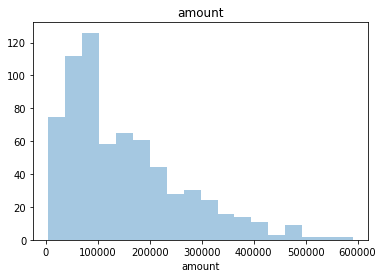

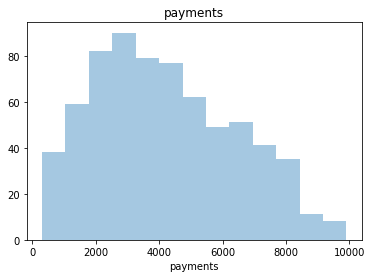

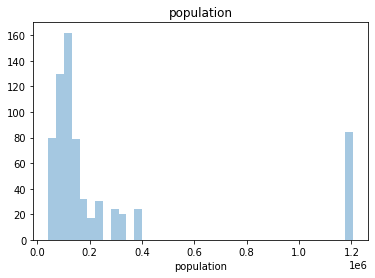

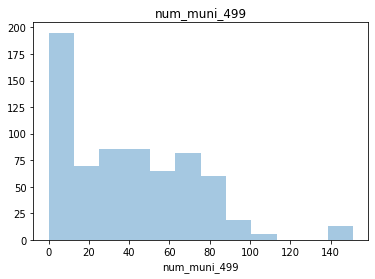

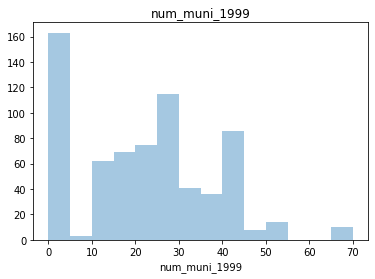

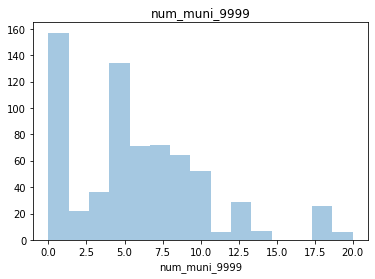

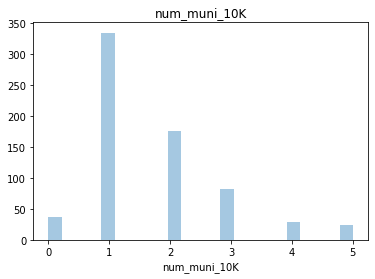

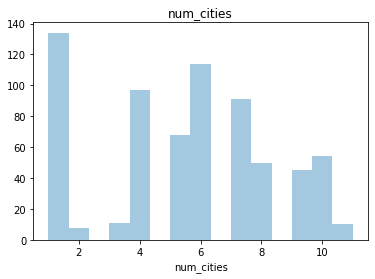

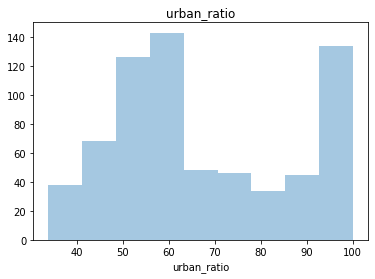

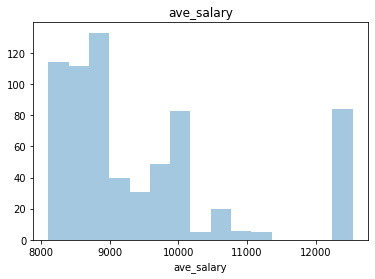

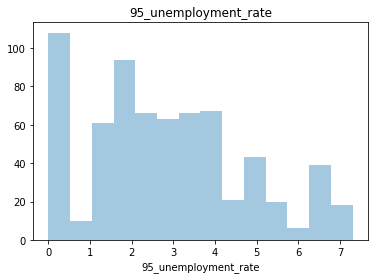

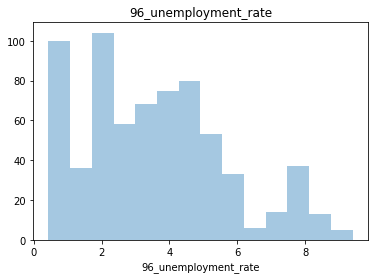

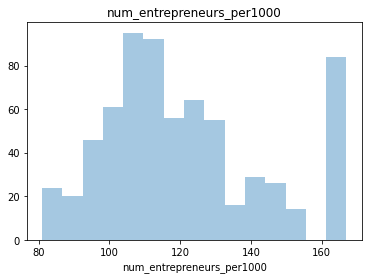

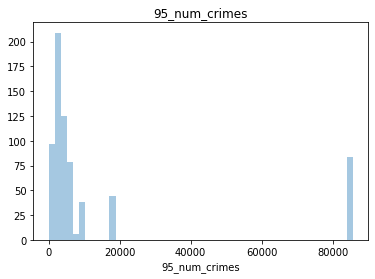

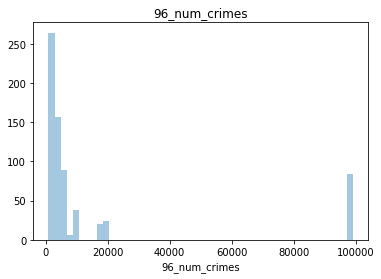

In [22]:
#Plotting numerical data
for column in numerical_variables:
  sns.distplot(loans_df[column], kde=False)
  plt.title(f'{column}')
  plt.show()

# Transforming the Data

In [23]:
#Using ColumnTransformer
variable_transformer = ColumnTransformer(transformers=[('continuous', 'passthrough', numerical_variables),
                                                      ('ordinal', OrdinalEncoder(), ordinal_variables),
                                                      ('nominal', OneHotEncoder(sparse=False), nominal_variables)],
                                                      remainder='drop')

In [35]:
#Set variables
X = loans_df.drop(columns='status')
y = loans_df['status']

In [36]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
#Fit the above transformer
variable_transformer.fit(X)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('continuous', 'passthrough',
                                 ['amount', 'payments', 'population',
                                  'num_muni_499', 'num_muni_1999',
                                  'num_muni_9999', 'num_muni_10K', 'num_cities',
                                  'urban_ratio', 'ave_salary',
                                  '95_unemployment_rate',
                                  '96_unemployment_rate',
                                  'num_entrepreneurs_per1000', '95_num_crimes',
                                  '96_num_crimes']),
                                ('ordinal',
                                 OrdinalEncoder(categories='auto',
                                                dtype=<class 'numpy.float64'>),
                                 ['loan_date', 'acct_date']),
                                ('nomina

In [43]:
#Transform dataframe
X_train_transformed = variable_transformer.transform(X_train)
X_test_transformed = variable_transformer.transform(X_test)

In [44]:
#Nominal column headings
nominal_names = variable_transformer.named_transformers_['nominal'].categories_

transformed_nominal_columns = []

for column, name_list in zip(nominal_variables, nominal_names):
    for name in name_list:
        transformed_nominal_columns.append('_'.join([column, str(name)]))

In [45]:
#Column headings
transformed_columns = numerical_variables + ordinal_variables + transformed_nominal_columns

In [46]:
#Converting back to dataframe
X_train_transform_df = pd.DataFrame(X_train_transformed, columns=transformed_columns)
X_test_transform_df = pd.DataFrame(X_test_transformed, columns=transformed_columns)
X_train_transform_df.head()

,amount,payments,population,num_muni_499,num_muni_1999,num_muni_9999,num_muni_10K,num_cities,urban_ratio,ave_salary,95_unemployment_rate,96_unemployment_rate,num_entrepreneurs_per1000,95_num_crimes,96_num_crimes,loan_date,acct_date,frequency_Immediately,frequency_Monthly,frequency_Weekly,duration_12,duration_24,duration_36,duration_48,duration_60,dist_name_Benesov,dist_name_Beroun,dist_name_Blansko,dist_name_Breclav,dist_name_Brno - mesto,dist_name_Brno - venkov,dist_name_Bruntal,dist_name_Ceska Lipa,dist_name_Ceske Budejovice,dist_name_Cesky Krumlov,dist_name_Cheb,dist_name_Chomutov,dist_name_Chrudim,dist_name_Decin,dist_name_Domazlice,dist_name_Frydek - Mistek,dist_name_Havlickuv Brod,dist_name_Hl.m. Praha,dist_name_Hodonin,dist_name_Hradec Kralove,dist_name_Jablonec n. Nisou,dist_name_Jesenik,dist_name_Jicin,dist_name_Jihlava,dist_name_Jindrichuv Hradec,dist_name_Karlovy Vary,dist_name_Karvina,dist_name_Kladno,dist_name_Klatovy,dist_name_Kolin,dist_name_Kromeriz,dist_name_Kutna Hora,dist_name_Liberec,dist_name_Litomerice,dist_name_Louny,dist_name_Melnik,dist_name_Mlada Boleslav,dist_name_Most,dist_name_Nachod,dist_name_Novy Jicin,dist_name_Nymburk,dist_name_Olomouc,dist_name_Opava,dist_name_Ostrava - mesto,dist_name_Pardubice,dist_name_Pelhrimov,dist_name_Pisek,dist_name_Plzen - jih,dist_name_Plzen - mesto,dist_name_Plzen - sever,dist_name_Prachatice,dist_name_Praha - vychod,dist_name_Praha - zapad,dist_name_Prerov,dist_name_Pribram,dist_name_Prostejov,dist_name_Rakovnik,dist_name_Rokycany,dist_name_Rychnov nad Kneznou,dist_name_Semily,dist_name_Sokolov,dist_name_Strakonice,dist_name_Sumperk,dist_name_Svitavy,dist_name_Tabor,dist_name_Tachov,dist_name_Teplice,dist_name_Trebic,dist_name_Trutnov,dist_name_Uherske Hradiste,dist_name_Usti nad Labem,dist_name_Usti nad Orlici,dist_name_Vsetin,dist_name_Vyskov,dist_name_Zdar nad Sazavou,dist_name_Zlin,dist_name_Znojmo,region_Prague,region_central Bohemia,region_east Bohemia,region_north Bohemia,region_north Moravia,region_south Bohemia,region_south Moravia,region_west Bohemia
0,320592.0,6679.0,145688.0,22.0,41.0,13.0,2.0,5.0,40.7,8544.0,1.2,1.86,109.0,2719.0,2906.0,213.0,201.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,15192.0,633.0,122603.0,25.0,21.0,6.0,2.0,8.0,80.0,8991.0,1.3,2.01,128.0,5198.0,5273.0,251.0,175.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,151728.0,3161.0,323870.0,0.0,0.0,0.0,1.0,1.0,100.0,10673.0,4.7,5.44,100.0,18782.0,18347.0,117.0,143.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,66840.0,2785.0,58796.0,22.0,16.0,7.0,1.0,5.0,51.9,9045.0,3.1,3.60,124.0,1845.0,1879.0,326.0,293.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,61056.0,1272.0,1204953.0,0.0,0.0,0.0,1.0,1.0,

In [47]:
X_train_transform_df.shape

(545, 110)

In [48]:
X_test_transform_df.shape

(137, 110)

In [49]:
X_train_transform_df.to_csv('data/train_transformed.csv')
X_test_transform_df.to_csv('data/test_transformed.csv')

# Features Selection

## Using Anova for Continuous Independent and Categorical Dependent Variables

In [55]:
#Set variable
X_columns = numerical_variables + ordinal_variables

In [62]:
#Scaling the data
loan_scaler = StandardScaler()
X_train_scale = loan_scaler.fit_transform(X_train_transform_df[X_columns])
X_test_scale = loan_scaler.fit_transform(X_test_transform_df[X_columns])

In [63]:
#use SelectKBest
loan_selector_anova = SelectKBest(score_func = f_classif, k=4)
loan_selector_anova.fit(X_train_scale, y_train)

SelectKBest(k=4, score_func=<function f_classif at 0x7fcd79d42268>)

In [64]:
#Anova values
loan_selector_anova.scores_

array([1.30596594e+01, 1.97640128e+01, 1.77909118e-01, 1.89003539e-03,
       5.99715129e-01, 1.38666425e+00, 2.48716682e-01, 1.00085419e+00,
       5.60856737e-01, 2.07489766e-01, 5.46037414e-01, 1.12244622e-01,
       2.32733407e+00, 2.61900057e-01, 3.21890819e-01, 8.62887886e+00,
       4.20742819e+00])

In [65]:
#Pvalues
loan_selector_anova.pvalues_.round(3)

array([0.   , 0.   , 0.673, 0.965, 0.439, 0.239, 0.618, 0.318, 0.454,
       0.649, 0.46 , 0.738, 0.128, 0.609, 0.571, 0.003, 0.041])

In [66]:
print(loan_selector_anova.get_support())

[ True  True False False False False False False False False False False
 False False False  True  True]


In [67]:
X_train_transform_df.columns[loan_selector_anova.get_support(True)]

Index(['amount', 'payments', 'loan_date', 'acct_date'], dtype='object')

Note: Features selected for continuous variables are: 'amount', 'payments', 'loan_date', 'acct_date'

## Using Chi-square for Categorical Independent and Dependent Variables

In [68]:
loan_selector_chi2 = SelectKBest(score_func = chi2, k=7)
loan_selector_chi2.fit(X_train_transform_df.drop(columns=X_columns), y_train)

SelectKBest(k=7, score_func=<function chi2 at 0x7fcd79d42378>)

In [69]:
#Chi2 values
loan_selector_chi2.scores_

array([2.86368843e-04, 2.34911942e-03, 1.25675012e-02, 4.97346877e-01,
       5.91802755e-01, 1.43751489e-03, 4.45806631e-03, 7.28056381e-06,
       3.71134021e-01, 4.94845361e-01, 4.12542955e-01, 3.71134021e-01,
       5.87633920e+00, 1.81486254e-02, 6.20704467e+00, 7.42268041e-01,
       7.67059401e-02, 1.96019473e-01, 3.71134021e-01, 1.81486254e-02,
       4.28934708e+00, 2.47422680e-01, 3.10352234e+00, 2.13610702e-01,
       1.96019473e-01, 6.67539197e-01, 6.18556701e-01, 3.71134021e-01,
       1.23711340e-01, 7.42268041e-01, 8.65979381e-01, 3.71134021e-01,
       1.03951890e-02, 3.05211913e+00, 4.43163321e-01, 7.67059401e-02,
       2.47422680e-01, 1.11340206e+00, 9.54562810e-05, 3.05211913e+00,
       7.42268041e-01, 4.94845361e-01, 1.23711340e+00, 4.94845361e-01,
       1.52605956e+00, 6.18556701e-01, 7.42268041e-01, 7.99183849e-01,
       9.89690722e-01, 3.92038946e-01, 4.28934708e+00, 7.64554275e-01,
       1.11340206e+00, 4.94845361e-01, 3.71134021e-01, 9.89690722e-01,
      

In [70]:
#Pvalues
loan_selector_chi2.pvalues_.round(3)

array([0.986, 0.961, 0.911, 0.481, 0.442, 0.97 , 0.947, 0.998, 0.542,
       0.482, 0.521, 0.542, 0.015, 0.893, 0.013, 0.389, 0.782, 0.658,
       0.542, 0.893, 0.038, 0.619, 0.078, 0.644, 0.658, 0.414, 0.432,
       0.542, 0.725, 0.389, 0.352, 0.542, 0.919, 0.081, 0.506, 0.782,
       0.619, 0.291, 0.992, 0.081, 0.389, 0.482, 0.266, 0.482, 0.217,
       0.432, 0.389, 0.371, 0.32 , 0.531, 0.038, 0.382, 0.291, 0.482,
       0.542, 0.32 , 0.658, 0.389, 0.767, 0.542, 0.992, 0.482, 0.352,
       0.992, 0.217, 0.893, 0.658, 0.619, 0.078, 0.002, 0.482, 0.055,
       0.138, 0.782, 0.482, 0.658, 0.482, 0.32 , 0.619, 0.919, 0.432,
       0.352, 0.389, 0.205, 0.371, 0.414, 0.619, 0.842, 0.048, 0.229,
       0.313, 0.915, 0.499])

In [71]:
print(loan_selector_chi2.get_support())

[False False False False False False False False False False False False
  True False  True False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False  True False  True
 False False False False False False False False False False False False
 False False False False  True False False False False]


In [72]:
print(loan_selector_chi2.get_support(True))

[12 14 20 50 69 71 88]


In [74]:
X_train_transform_df.drop(columns=X_columns).columns[loan_selector_chi2.get_support(True)]

Index(['dist_name_Brno - mesto', 'dist_name_Bruntal', 'dist_name_Chrudim',
       'dist_name_Opava', 'dist_name_Strakonice', 'dist_name_Svitavy',
       'region_north Bohemia'],
      dtype='object')

Note: Features selected for categorical variables are: 'dist_name_Brno - mesto', 'dist_name_Bruntal', 'dist_name_Chrudim', 'dist_name_Opava', 'dist_name_Strakonice', 'dist_name_Svitavy', 'region_north Bohemia' 

In [75]:
features_selected = ['amount', 'payments', 'loan_date', 'acct_date', 'dist_name_Brno - mesto', 
                    'dist_name_Bruntal', 'dist_name_Chrudim', 'dist_name_Opava', 'dist_name_Strakonice', 
                    'dist_name_Svitavy', 'region_north Bohemia']

# Data Modeling

## Using Decision Tree

In [78]:
#Creating and fitting the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_transform_df[features_selected], y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [79]:
dt_model.feature_importances_

array([0.21358867, 0.35161547, 0.18710669, 0.18084011, 0.00942563,
       0.        , 0.        , 0.03034047, 0.01828379, 0.00879916,
       0.        ])

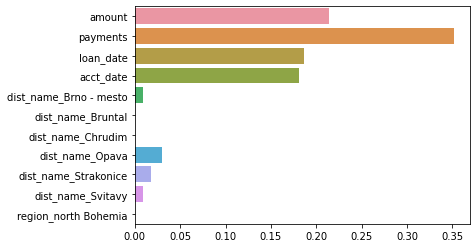

In [80]:
#Plotting feature importances
sns.barplot(dt_model.feature_importances_, X_train_transform_df[features_selected].columns)

In [53]:
import eli5

/home/learner/Documents/DS_projects/unit4_project/unit4_env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/learner/Documents/DS_projects/unit4_project/unit4_env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [54]:
eli5.show_weights(dt_model, feature_names = features_selected)

Weight,Feature
0.3516,payments
0.2136,amount
0.1871,loan_date
0.1808,acct_date
0.0303,dist_name_Opava
0.0183,dist_name_Strakonice
0.0094,dist_name_Brno - mesto
0.0088,dist_name_Svitavy
0,region_north Bohemia
0,dist_name_Chrudim


Checking accuracy scores

In [81]:
dt_model.score(X_train_transform_df[features_selected], y_train)

1.0

In [82]:
dt_model.score(X_test_transform_df[features_selected], y_test)

0.781021897810219

Checking recall scores

In [84]:
y_train_pred_dt = dt_model.predict(X_train_transform_df[features_selected])
y_test_pred_dt = dt_model.predict(X_test_transform_df[features_selected])

In [85]:
recall_score(y_train, y_train_pred_dt)

1.0

In [86]:
recall_score(y_test, y_test_pred_dt)

0.8429752066115702

Plotting confusion matrix

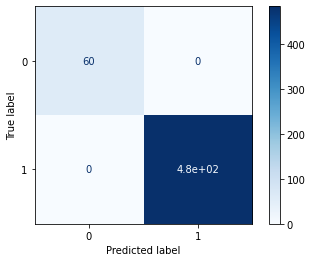

In [87]:
plot_confusion_matrix(dt_model, X_train_transform_df[features_selected], y_train, cmap = 'Blues')

Let's look at Shap values to explain model

In [88]:
import shap

In [89]:
explainer = shap.TreeExplainer(dt_model)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [90]:
shap_values = explainer.shap_values(X_test_transform_df[features_selected])

In [91]:
#Plotting shap values
shap.initjs()

shap.force_plot(base_value = explainer.expected_value[1],
               shap_values = shap_values[1],
               feature_names = features_selected)

In [92]:
#Plotting a data point
shap.initjs()

shap.force_plot(base_value = explainer.expected_value[1],
               shap_values = shap_values[1][3],
               features = (X_test_transform_df[features_selected].iloc[3,:]).values,
               feature_names = features_selected)

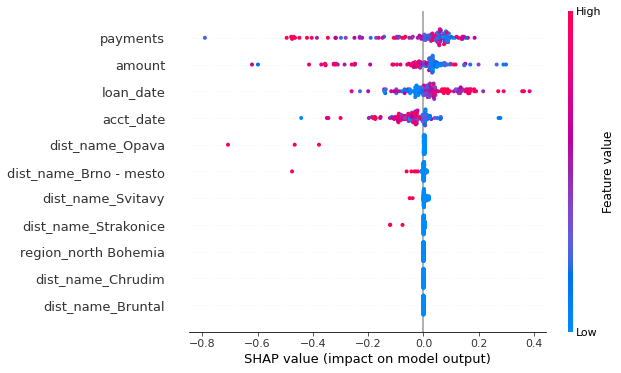

In [93]:
#Summary plot for status
shap.summary_plot(shap_values[1], X_test_transform_df[features_selected], feature_names = features_selected)

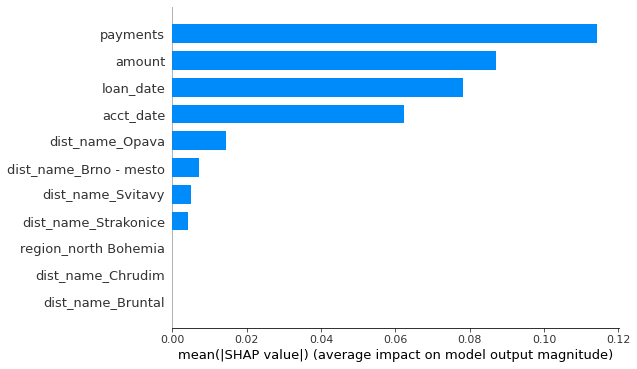

In [94]:
#Plotting mean magnitude of the Shap value for each variable
shap.summary_plot(shap_values[1], 
                  X_test_transform_df[features_selected], 
                  plot_type='bar')

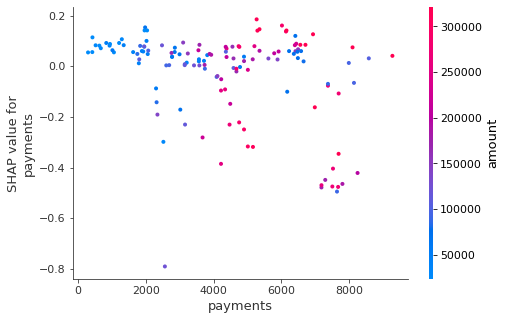

In [95]:
#Show payments vs Shap value for payments
shap.dependence_plot('payments', 
                     shap_values[1], 
                     X_test_transform_df[features_selected], 
                     feature_names=features_selected)                     

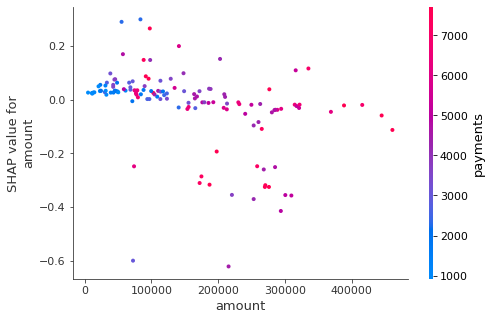

In [96]:
#Show amount vs Shap value for amount
shap.dependence_plot('amount', 
                     shap_values[1], 
                     X_test_transform_df[features_selected], 
                     feature_names=features_selected)                     

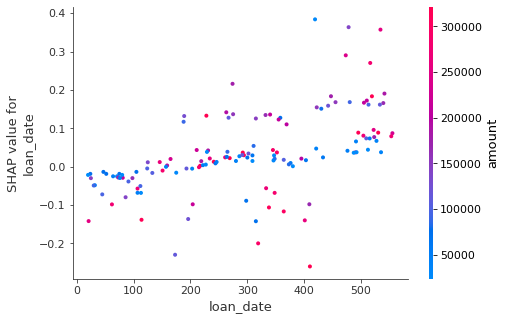

In [97]:
#Show loan_date vs Shap value for loan_date
shap.dependence_plot('loan_date', 
                     shap_values[1], 
                     X_test_transform_df[features_selected], 
                     feature_names=features_selected)                     

## Using Random Forest

In [98]:
#Creating model
rf_model = RandomForestClassifier(verbose=1, random_state=42)

In [99]:
#Fitting the model
rf_model.fit(X_train_transform_df[features_selected], y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)

In [100]:
#Using list indexing to access information in each of these individual decision trees
rf_model.estimators_[0].feature_importances_.round(3)

array([0.126, 0.312, 0.103, 0.361, 0.021, 0.   , 0.002, 0.012, 0.018,
       0.041, 0.005])

In [101]:
#Feature importance of random forest
rf_model.feature_importances_.round(3)

array([0.203, 0.247, 0.222, 0.223, 0.019, 0.015, 0.011, 0.021, 0.016,
       0.018, 0.007])

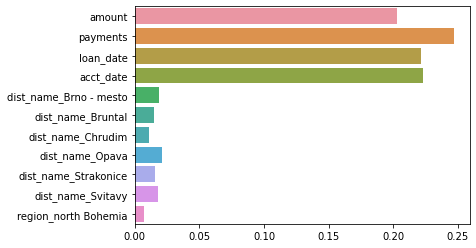

In [102]:
#Plotting feature importances
sns.barplot(rf_model.feature_importances_, X_test_transform_df[features_selected].columns)

Checking accuracy scores

In [103]:
rf_model.score(X_train_transform_df[features_selected], y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


1.0

In [104]:
rf_model.score(X_test_transform_df[features_selected], y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


0.8759124087591241

Checking recall scores

In [105]:
y_train_pred_rf = rf_model.predict(X_train_transform_df[features_selected])
y_test_pred_rf = rf_model.predict(X_test_transform_df[features_selected])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [106]:
print(f'Train Recall Score:{recall_score(y_train, y_train_pred_rf): .3f}')
print(f'Test Recall Score:{recall_score(y_test, y_test_pred_rf): .3f}')

Train Recall Score: 1.000
Test Recall Score: 0.975


In [107]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 1,
 'warm_start': False}

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


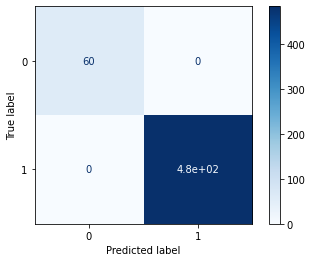

In [108]:
#Plotting confusion matrix
plot_confusion_matrix(rf_model, X_train_transform_df[features_selected], y_train, cmap = 'Blues')

Let's look at Shap values on X_test to explain model

In [109]:
rf_explainer = shap.TreeExplainer(rf_model)
rf_shap_values = rf_explainer.shap_values(X_test_transform_df[features_selected])

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [110]:
#Force plot for all validation values
shap.initjs()

shap.force_plot(rf_explainer.expected_value[1],
                rf_shap_values[1],
                feature_names = features_selected)

In [111]:
#Looking at 1 data point
shap.initjs()

shap.force_plot(rf_explainer.expected_value[1],
                rf_shap_values[1][3],
                feature_names = features_selected,
                features = X_test_transform_df[features_selected].iloc[3,:].values)

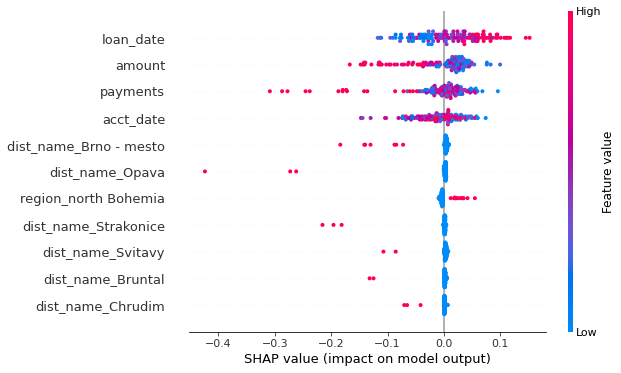

In [112]:
#Summary plot for status
shap.summary_plot(rf_shap_values[1], X_test_transform_df[features_selected], feature_names = features_selected)

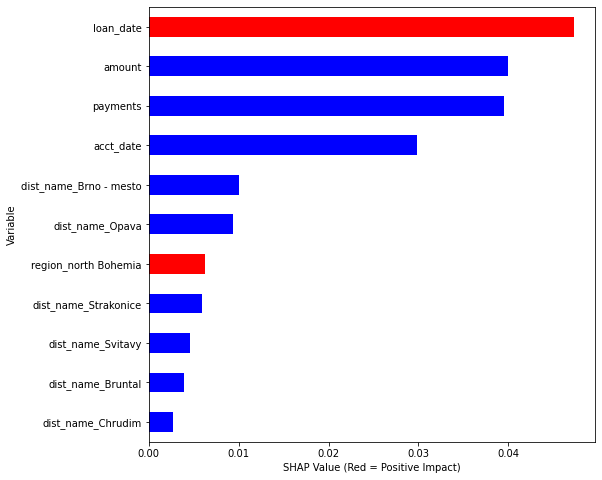

In [113]:
#Simplifying above correlation plot

def ABS_SHAP(df_shap, df):
    
    #Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index', axis=1)
    
    #Determine the correlation
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i], df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list), pd.Series(corr_list)], axis=1).fillna(0)
    
    #Make a dataframe
    corr_df.columns = ['Variable', 'Corr']
    corr_df['Sign'] = np.where(corr_df['Corr'] > 0, 'red', 'blue')
    
    #Plotting
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable', 'SHAP_abs']
    k2 = k.merge(corr_df, left_on = 'Variable', right_on='Variable', how='inner')
    k2 = k2.sort_values(by='SHAP_abs', ascending=True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable', y='SHAP_abs', color=colorlist, figsize=(8,8), legend=False)
    ax.set_xlabel('SHAP Value (Red = Positive Impact)')
     
ABS_SHAP(rf_shap_values[1], X_test_transform_df[features_selected])    

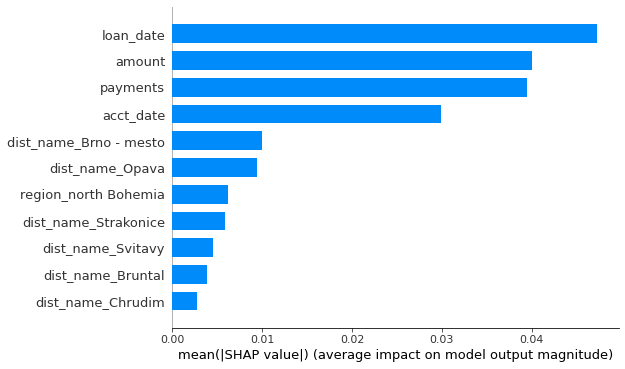

In [114]:
#This shows the mean magnitude of the Shap value for each variable
shap.summary_plot(rf_shap_values[1], 
                  X_test_transform_df[features_selected], 
                  plot_type='bar')

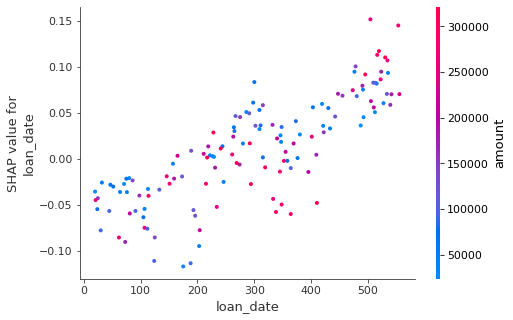

In [115]:
#Show loan_date vs Shap value for loan_date
shap.dependence_plot('loan_date', 
                     rf_shap_values[1], 
                     X_test_transform_df[features_selected], 
                     feature_names=features_selected)                     

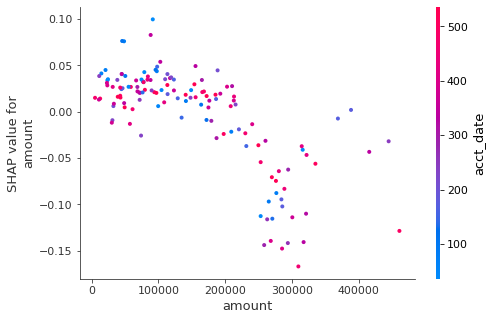

In [116]:
#Show amount vs Shap value for amount
shap.dependence_plot('amount', 
                     rf_shap_values[1], 
                     X_test_transform_df[features_selected], 
                     feature_names=features_selected) 

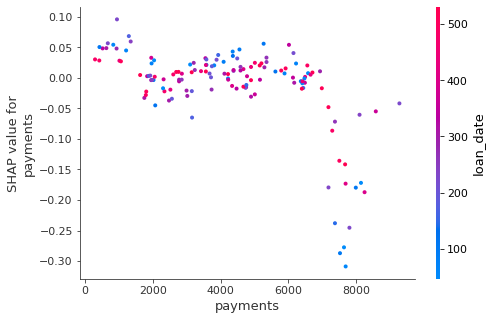

In [117]:
#Show payments vs Shap value for payments
shap.dependence_plot('payments', 
                     rf_shap_values[1], 
                     X_test_transform_df[features_selected], 
                     feature_names=features_selected) 

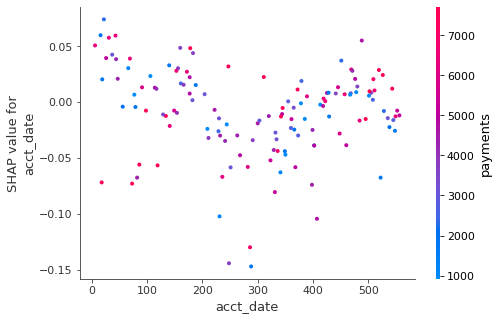

In [118]:
#Show acct_date vs Shap value for acct_date
shap.dependence_plot('acct_date', 
                     rf_shap_values[1], 
                     X_test_transform_df[features_selected], 
                     feature_names=features_selected) 

Let's look at Shap values on X_train to explain model

In [132]:
rf_shap_values2 = rf_explainer.shap_values(X_train_transform_df[features_selected])

In [133]:
#Force plot for all validation values
shap.initjs()

shap.force_plot(rf_explainer.expected_value[1],
                rf_shap_values2[1],
                feature_names = features_selected)

In [134]:
#Looking at 1 data point
shap.initjs()

shap.force_plot(rf_explainer.expected_value[1],
                rf_shap_values2[1][3],
                feature_names = features_selected,
                features = X_train_transform_df[features_selected].iloc[3,:].values)

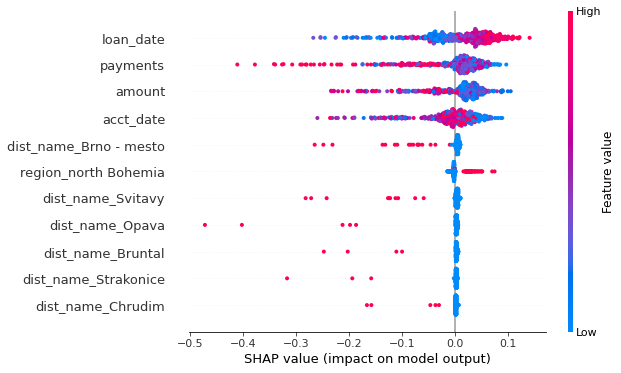

In [136]:
#Summary plot for status
shap.summary_plot(rf_shap_values2[1], X_train_transform_df[features_selected], feature_names = features_selected)

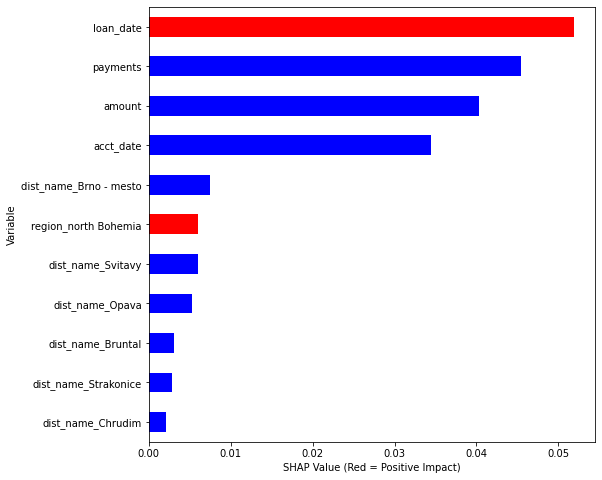

In [137]:
#Simplifying above correlation plot

def ABS_SHAP(df_shap, df):
    
    #Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index', axis=1)
    
    #Determine the correlation
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i], df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list), pd.Series(corr_list)], axis=1).fillna(0)
    
    #Make a dataframe
    corr_df.columns = ['Variable', 'Corr']
    corr_df['Sign'] = np.where(corr_df['Corr'] > 0, 'red', 'blue')
    
    #Plotting
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable', 'SHAP_abs']
    k2 = k.merge(corr_df, left_on = 'Variable', right_on='Variable', how='inner')
    k2 = k2.sort_values(by='SHAP_abs', ascending=True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable', y='SHAP_abs', color=colorlist, figsize=(8,8), legend=False)
    ax.set_xlabel('SHAP Value (Red = Positive Impact)')
     
ABS_SHAP(rf_shap_values2[1], X_train_transform_df[features_selected])    

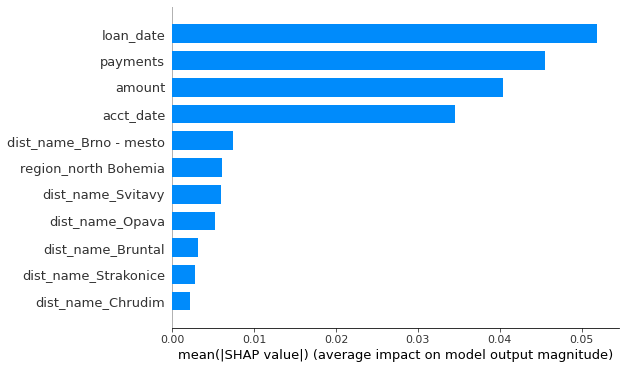

In [138]:
#This shows the mean magnitude of the Shap value for each variable
shap.summary_plot(rf_shap_values2[1], 
                  X_train_transform_df[features_selected], 
                  plot_type='bar')

## Using Logistic Regression

In [119]:
#Creating Logistic Regression model and fitting the model
log_model = LogisticRegression(random_state=42)

log_model.fit(X_train_transform_df[features_selected], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
#Check accuracy scores
print(f'Train accuracy: {log_model.score(X_train_transform_df[features_selected], y_train)}')
print(f'Test accuracy: {log_model.score(X_test_transform_df[features_selected], y_test)}')

Train accuracy: 0.8862385321100917
Test accuracy: 0.8832116788321168


In [121]:
y_train_pred_log = log_model.predict(X_train_transform_df[features_selected])
y_test_pred_log = log_model.predict(X_test_transform_df[features_selected])

In [122]:
#Check recall scores
print(f'Train recall: {recall_score(y_train, y_train_pred_log)}')
print(f'Test recall: {recall_score(y_test, y_test_pred_log)}')

Train recall: 0.9958762886597938
Test recall: 1.0


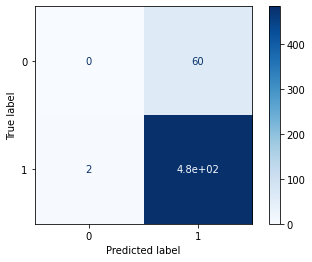

In [123]:
#Plotting confusion matrix
plot_confusion_matrix(log_model, X_train_transform_df[features_selected], y_train, cmap = 'Blues')

## Using Support Vector Machine

### LinearSVC

In [124]:
#Creating and fitting the model
lin_svc = LinearSVC(random_state=42, verbose=1, dual=False)

lin_svc.fit(X_train_transform_df[features_selected], y_train)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=1)

In [125]:
lin_svc.coef_

array([[-7.10213113e-07,  6.68634582e-05,  2.37048453e-03,
        -5.07368902e-04, -9.29829477e-06, -6.63951597e-06,
        -3.38028692e-06, -7.06472800e-06, -7.14979135e-06,
        -8.70492821e-06,  2.85468962e-05]])

In [126]:
lin_svc.decision_function(X_train_transform_df[features_selected])[:10]

array([0.62195881, 0.53787143, 0.30852347, 0.76299731, 0.20579266,
       0.19054886, 1.23223092, 0.93145211, 0.95042528, 0.37148081])

In [127]:
print(f'Train accuracy: {lin_svc.score(X_train_transform_df[features_selected], y_train)}')
print(f'Test accuracy: {lin_svc.score(X_test_transform_df[features_selected], y_test)}')

Train accuracy: 0.8899082568807339
Test accuracy: 0.8832116788321168


In [128]:
y_train_pred_lsvc = lin_svc.predict(X_train_transform_df[features_selected])
y_test_pred_lsvc = lin_svc.predict(X_test_transform_df[features_selected])

In [130]:
#Check recall scores
print(f'Train recall: {recall_score(y_train, y_train_pred_lsvc)}')
print(f'Test recall: {recall_score(y_test, y_test_pred_lsvc)}')

Train recall: 1.0
Test recall: 1.0


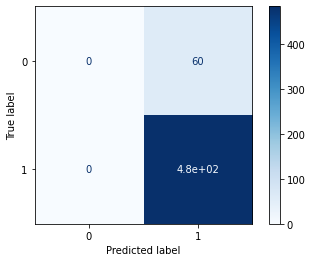

In [131]:
#Plotting confusion matrix
plot_confusion_matrix(lin_svc, X_train_transform_df[features_selected], y_train, cmap = 'Blues')

# Final Model - Random Forest